# Energy A.I. Hackathon 2025 - Project Template 

## General Guidance

We're expecting a workflow that could be deployed to any competent engineer or scientist with basic subsurface resource, data analytics and machine learning knowledge and they could understand and apply your workflow. 

### Expectations on the Workflow

* include short descriptions, no 2 code blocks should be adjacent, always have a short statement to explain the next code block

* be as concise as possible:

    * use point form (except for the executive summary) 
    * use effective, creative figures that compine what could have been in multiple plots
    * every line of code, statment or figure must have purpose
    * conciseness is part of the grading, don't add content that isn't needed
    
* be very clear with readable code

    * label every axis for every plot
    * use readable code, logical variable names, use available functionality and define functions and classes for compactness and concise comments in the code
    * proceed step by step, explain each important step concisely for a easy to follow narrative 
    
  
### Using Code From Others
  
You may use blocks/snipets of code from other sources with citation. To cite a set of code separate in a block and do this in the markdown above the block.

The following code block is from Professor Michael Pyrcz (@GeostatsGuy), SubSurfaceDataAnalytics_PCA.ipynb from [GeostatsGuy GitHub](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_PCA.ipynb).

```python
def simple_simple_krige(df,xcol,ycol,vcol,dfl,xlcol,ylcol,vario,skmean):
# load the variogram
    nst = vario['nst']; pmx = 9999.9
    cc = np.zeros(nst); aa = np.zeros(nst); it = np.zeros(nst)
```

or use inline citations with comments, such as this for a few of lines of code.

```python
def simple_simple_krige(df,xcol,ycol,vcol,dfl,xlcol,ylcol,vario,skmean): # function from Professor Michael Pyrcz,https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_PCA.ipynb 
```

## The Workflow Template

Here's the template for your workflow.

___

# Energy A.I. Hackathon 2025 Workflow - [Your Team Name] 

#### Authors: [Your Names],  [Your Departments and Schools] 

#### The University of Texas at Austin, Austin, Texas, USA 
___

### Executive Summary 

Only 4 short sentences.

1. What is the problem?
2. What did your team do to address the problem?
3. What did your team learn?
4. What does your team recommend going forward?

___

### Workflow Goal

1-2 sentences 
___

### Workflow Steps 

Enumerated steps, very short and concise overview of your methods and workflow

1. **Data Analysis** - basic data checking and visualization
2. **Feature Selection** - mutual information-based approach with minimum redundancy, maximum relevance score
3. **Machine Learning Model \#1** - Predict feature $X$ from $Y,Z$

$\ldots$


### Import Packages

In [13]:
import numpy as np                                      # model arrays
import pandas as pd                                     # DataFrames
import matplotlib.pyplot as plt                         # building plots
import os                                               # accessing the operating system

### Load Data

The following workflow applies the .csv file '300well_MV.csv', a synthetic dataset calculated with geostatistical cosimulation by Wayne Gretzky, The Edmonton Oilers Hockey Team. The dataset is publically available [here](http://www.hasthelargehadroncolliderdestroyedtheworldyet.com/)  

We will work with the following features:

* **porosity** - fraction of rock void in units of percentage
* **permeability** - ability of a fluid to flow through the rock in mil;iDarcy
* **acoustic impedence** - product of sonic velocity and rock density in unitsof $kg/m^2s*10^3$

In [25]:
os.chdir("c:/PGE383")                                   # set the working directory
my_data = pd.read_csv("unconv_MV.csv")                  # load the comma delimited data file
my_data = my_data.iloc[:,1:]                           # copy all rows and columns 1 through 8, note 0 column is removed

### Functions

The following functions will be used in the workflow.

In [26]:
def plot_corr(dataframe,size=10):                       # plots a correlation matrix as a heat map 
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.title('Correlation Matrix')

### Basic Data Checking and Visualization

Since our method relies on the assumption of pairwise correlation, we check the correlation matrix and confirm this. 

* the absolute pariwise correlations exceed 0.6 for por and logperm, por and AI, AI and TOC etc. 

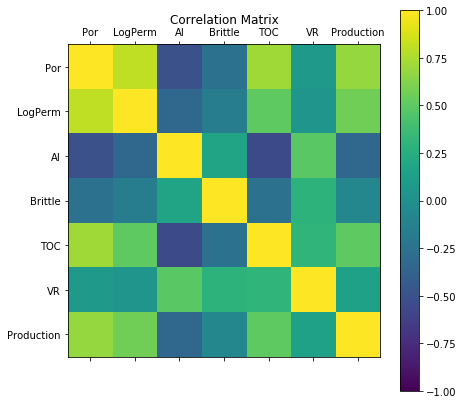

In [27]:
plot_corr(my_data,size = 7)